# **Importar** las bibliotecas necesarias

> Instalar librerias con el siguiente comando:  `pip install -r requirements.txt`

In [6]:
# Visualizacion y manipulación
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import os

# Paso 1: Descargar el conjunto de datos

In [ ]:
# URL del archivo comprimido
url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Descargar el archivo y descomprimirlo
with requests.get(url) as r:
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        z.extractall(path="./prueba_i2ds/")

# Ahora los archivos están descomprimidos en la ruta "./prueba_i2ds/" y listo para ser utilizados


# Paso 2: Conexión a Google Drive y Google Sheets

- Subir archvio a Google Drive

In [136]:
from GoogleDrive import subir_archivo

subir_archivo(
    ruta_archivo = "./prueba_i2ds/online_retail_II.xlsx",
    id_folder = "1FdyTzg04CGQCdPBJ5IeDjTDBH-o8oaRn"
    
)


- Leer el archivo .xlsx

In [199]:
from GoogleSheets import get_xlsx_as_dataframe

df = get_xlsx_as_dataframe("1_EENrfe2FLUbku3QQXsgExRCDwY4dDzD")

# Paso 3: Manipulación de Datos con Pandas

In [200]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [201]:
# Filtrado: Eliminar filas con cantidades negativas o precios negativos
filtered_df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Ordenación: Ordenar por país y cantidad en orden descendente
filtered_df_sorted = filtered_df.sort_values(by=['Country', 'Quantity'], ascending=[True, False])

# Agrupación: Agrupar por país y calcular la suma de cantidades
country_consumption = filtered_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)


C:\Users\jonzn\AppData\Local\Temp\ipykernel_11336\18516558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_consumption.index, y=country_consumption.values, palette='viridis')


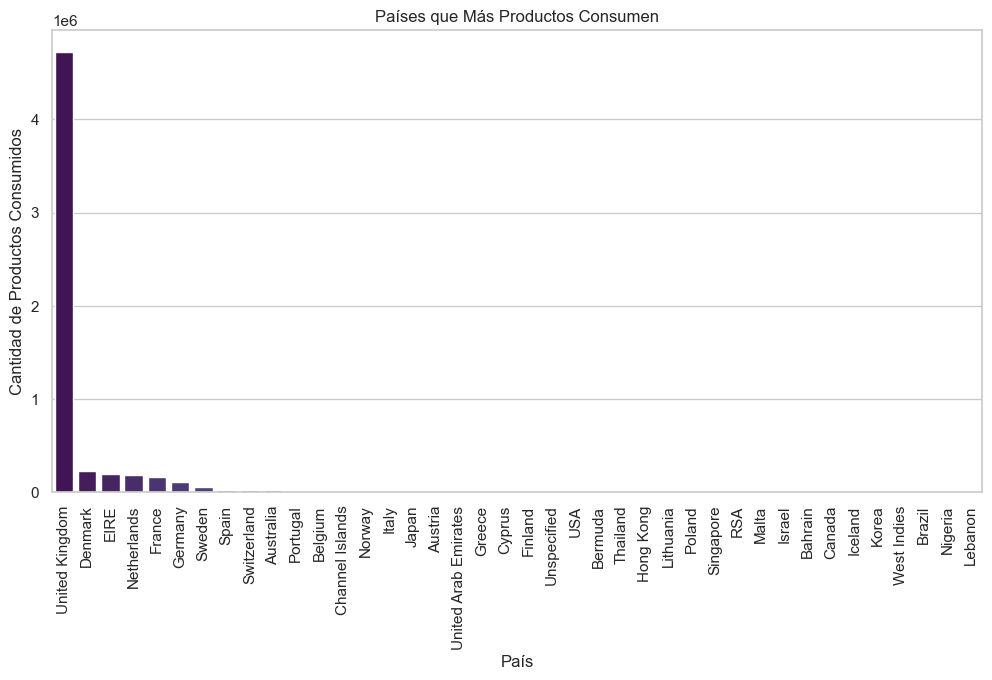

In [202]:
# Gráfico de barras para mostrar el país que más productos consume
plt.figure(figsize=(12, 6))
sns.barplot(x=country_consumption.index, y=country_consumption.values, palette='viridis')
plt.xlabel('País')
plt.ylabel('Cantidad de Productos Consumidos')
plt.title('Países que Más Productos Consumen')
plt.xticks(rotation=90)
plt.show()


C:\Users\jonzn\AppData\Local\Temp\ipykernel_11336\1997817390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.index, y=popular_products.values, palette='muted')


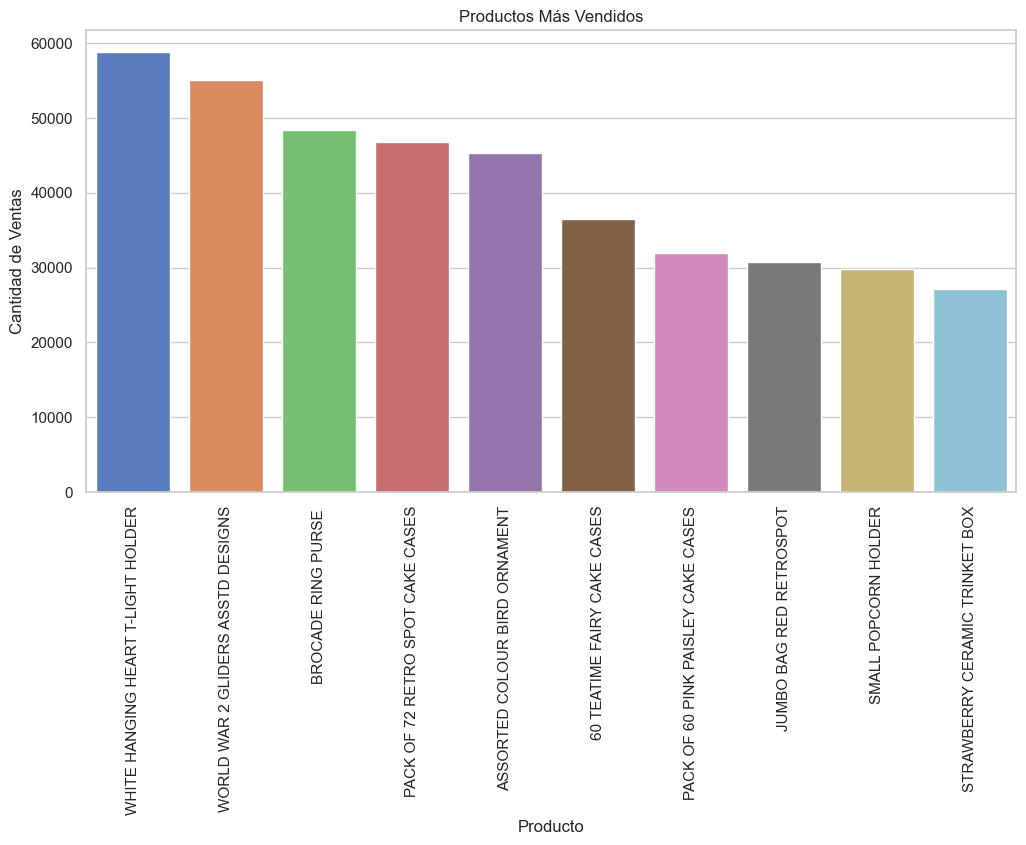

In [203]:
# Identificar los productos más vendidos
popular_products = filtered_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras para mostrar los productos más vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products.index, y=popular_products.values, palette='muted')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.title('Productos Más Vendidos')
plt.xticks(rotation=90)
plt.show()


C:\Users\jonzn\AppData\Local\Temp\ipykernel_11336\3539708182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['InvoiceDate'] = pd.to_datetime(filtered_df['InvoiceDate'])
C:\Users\jonzn\AppData\Local\Temp\ipykernel_11336\3539708182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['InvoiceDate'].dt.month


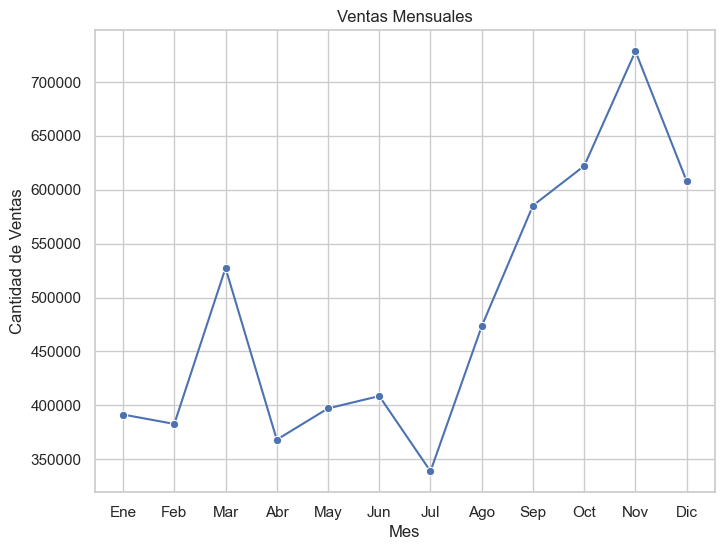

In [204]:
# Convertir 'InvoiceDate' a tipo datetime y extraer el mes
filtered_df['InvoiceDate'] = pd.to_datetime(filtered_df['InvoiceDate'])
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.month

# Agrupar por mes y sumar las cantidades
monthly_sales = filtered_df.groupby('Month')['Quantity'].sum()

# Gráfico de línea para mostrar las ventas mensuales
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas Mensuales')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()
